In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler
%store -r X_features
%store -r X_features_poly
%store -r y_labels

%store -r totaldf


### Βλέπουμε για τα στατιστικά των ensembles μοντέλων τα εξής. Η μέθοδος voting βελτίωσε πολύ  τις προβλέψεις μας με poly regressors αλλά ήταν λίγο χειρότερη στην περίπτωση των κανονικών regressors. To bagging είναι χειρότερο από το random forest ενώ τα boosted και gradient boosting είναι καλύτερα από τον απλό tree regressor.

In [2]:
poly_voting_reg = joblib.load("poly_voting_reg.pkl")
voting_reg = joblib.load("voting_reg.pkl")
bag_reg = joblib.load("bag_reg.pkl")
ada_reg = joblib.load('ada_reg.pkl')
xgb_reg = joblib.load('xgb_reg.pkl')
light_reg = joblib.load("light.pkl")
stack_reg = joblib.load('stack.pkl')



In [3]:
totaldf.insert(5,'poly voting μ', totaldf.μob*(np.exp(np.power(poly_voting_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(6,'voting μ', totaldf.μob*(np.exp(np.power(voting_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(7,'bagging μ', totaldf.μob*(np.exp(np.power(bag_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(8,'boosting μ', totaldf.μob*(np.exp(np.power(ada_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(9,'gradient boosting μ', totaldf.μob*(np.exp(np.power(xgb_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(10,'light μ',totaldf.μob*(np.exp(np.power(light_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(11,'stack μ', totaldf.μob*(np.exp(np.power(stack_reg.predict(X_features[2]),2)) -0.0012))

In [4]:
totaldf

,Pb,P,ΔP,μob,μ,poly voting μ,voting μ,bagging μ,boosting μ,gradient boosting μ,light μ,stack μ
0,2200.290403,2200.290403,0.000000,0.998694,0.998694,0.998736,0.998726,0.998694,0.998694,0.998716,0.998809,0.998694
1,2200.290403,2348.433431,148.143028,0.998694,1.007933,1.012439,1.012296,1.014645,1.014830,1.013071,1.013546,1.016201
2,2200.290403,2496.576459,296.286056,0.998694,1.017506,1.025814,1.025246,1.027264,1.027847,1.030968,1.027403,1.015177
3,2200.290403,2644.719487,444.429084,0.998694,1.027358,1.038573,1.038661,1.040454,1.040363,1.043388,1.039895,1.040582
4,2200.290403,2792.862515,592.572112,0.998694,1.037444,1.049120,1.043293,1.051021,1.053348,1.048358,1.050261,1.053692
...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.215923,5560.049012,1649.833090,0.125504,0.155127,0.150100,0.148563,0.156744,0.164566,0.161978,0.145158,0.153275
16,3910.215923,5670.037885,1759.821962,0.125504,0.157137,0.150125,0.150896,0.157235,0.156295,0.160683,0.145208,0.154341
17,3910.215923,5780.026758,1869.810835,0.125504,0.159150,0.152094,0.152544,0.158871,0.158566,0.159065,0.148110,0.155175
18,3910.215923,5890.015630,1979.799708,0.125504,0.161165,0.156703,0.154588,0.163245,0.173553,0.162738,0.146665,0.157043


In [5]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(7):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Voting polynomial features','Voting','Bagging','AdaBoost','Gradient Boosting','Light','Stacking'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,-0.302407,4.704337,2.888909,3.725110
Voting,-0.338723,4.633785,2.846607,3.671991
Bagging,0.001653,4.645144,2.913759,3.617648
AdaBoost,0.001539,5.152091,3.209409,4.030352
Gradient Boosting,0.279434,5.279827,3.299064,4.131686
Light,-0.209806,4.739400,3.006768,3.669507
Stacking,0.056123,5.055814,3.216889,3.900773


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,0.084379,3.390037,2.212764,3.918164
Voting,0.108301,3.320336,2.163169,3.860420
Bagging,0.465035,3.544841,2.358451,4.112761
AdaBoost,0.320026,3.852782,2.514432,4.833906
Gradient Boosting,0.625719,4.063206,2.658021,4.800541
Light,0.238823,3.773171,2.489149,4.213059
Stacking,0.558112,3.859702,2.584726,4.681625


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,-1.737668,6.296704,4.124457,88.105304
Voting,-1.877963,6.251931,4.144499,88.161957
Bagging,-1.233406,6.191511,3.962518,84.439531
AdaBoost,-1.228485,6.529184,4.194980,85.276872
Gradient Boosting,-1.054215,6.668584,4.227445,86.959932
Light,-1.056298,6.143250,3.878613,84.010794
Stacking,-1.521040,6.518968,4.215534,88.115486


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,-0.496824,5.289888,3.387107,157.176806
Voting,-0.547032,5.295844,3.396528,154.927526
Bagging,-0.308746,5.367877,3.497885,168.044717
AdaBoost,-0.209777,5.636154,3.649183,183.826898
Gradient Boosting,0.373518,6.243974,4.071453,207.211988
Light,-0.521877,5.342072,3.395205,162.464715
Stacking,0.006627,5.627916,3.800633,169.046289


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Voting polynomial features,2.422242,6.617648,4.622535,1113.482826
Voting,2.125386,6.092584,4.223005,1028.071211
Bagging,0.835901,5.428500,3.733918,880.985320
AdaBoost,2.628300,8.756114,6.700554,1388.563271
Gradient Boosting,2.338079,7.579591,5.534876,1242.996477
Light,-1.260304,5.840594,4.716729,858.420026
Stacking,1.563347,7.181878,5.399940,1069.276608


Text(0, 0.5, '% Average Absolute Error')

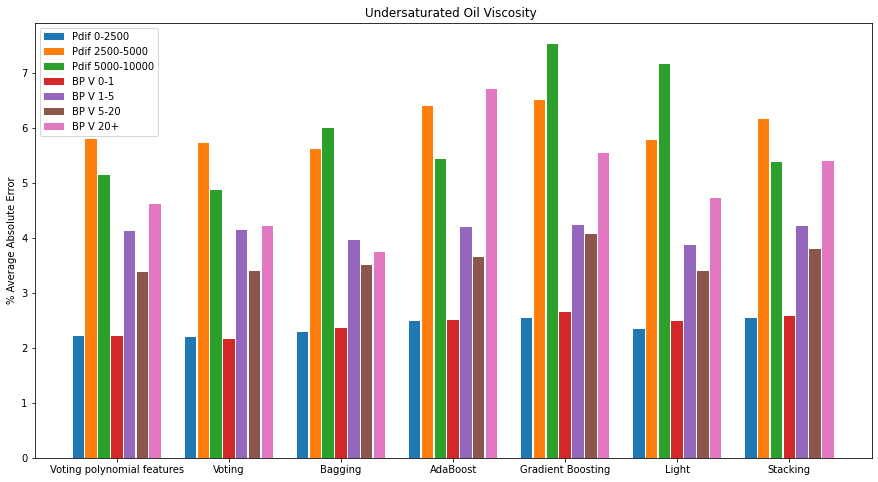

In [17]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}   
models =  ['Voting polynomial features','Voting','Bagging','AdaBoost','Gradient Boosting','Light','Stacking']

%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(7), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")